# Bias - Variance Tradeoff
### Julien Brenneck, June 2018

In [14]:
import numpy as np

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn
seaborn.set_color_codes()

cm = mpl.cm.RdBu
cm = mpl.cm.viridis
h = 0.02

In [26]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18.0}

mpl.rc('font', **font)

In [2]:
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.preprocessing import normalize, robust_scale
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

### Example 2D regression

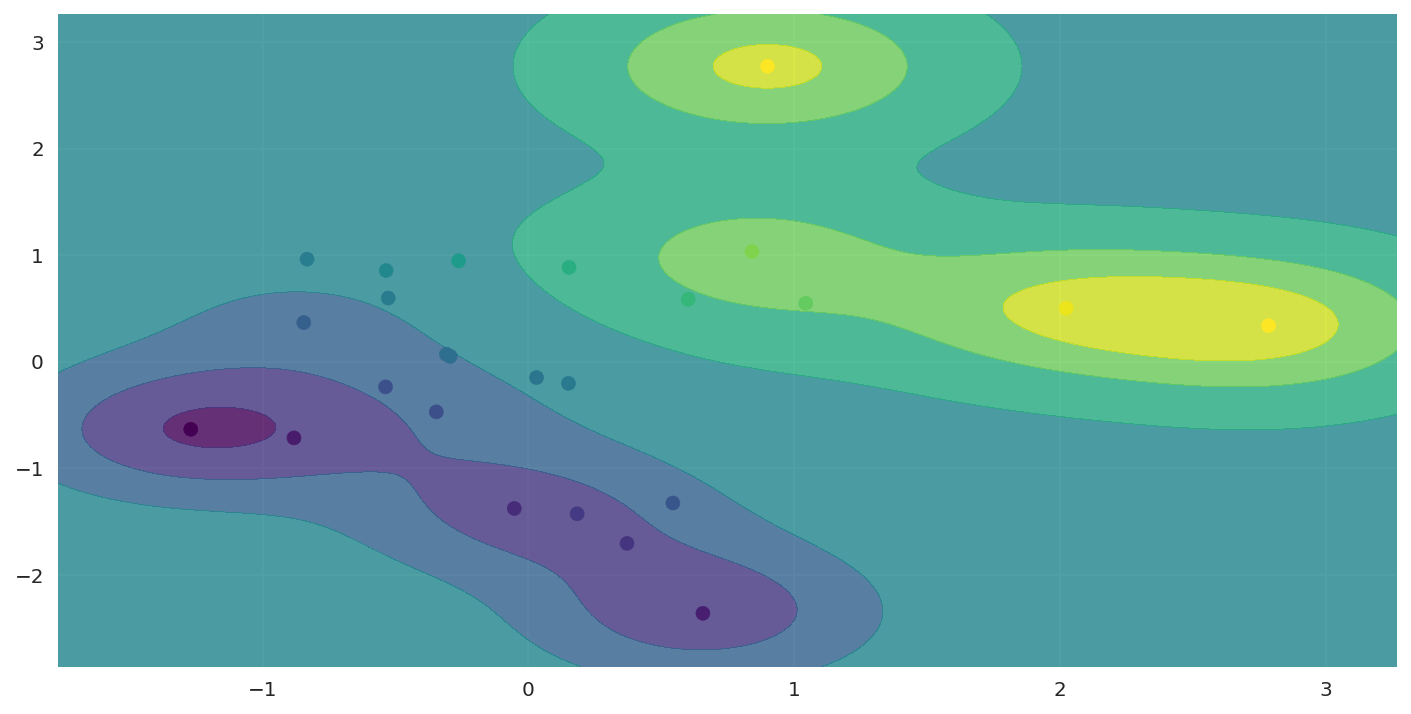

In [27]:
X, y = make_regression(25, 2, 2, noise=0)
y = robust_scale(y.reshape(-1,1))[:,0]

rbf = SVR(gamma=2.5, C=1, kernel='rbf')
rbf.fit(X, y)
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])

vmin = min(np.min(Z), np.min(y))
vmax = np.max(Z)

Z = Z.reshape(xx.shape)
plt.figure(figsize=(12,6))
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8, vmin=vmin, vmax=vmax)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm, vmin=vmin, vmax=vmax)

### Example 1D nonlinear regression

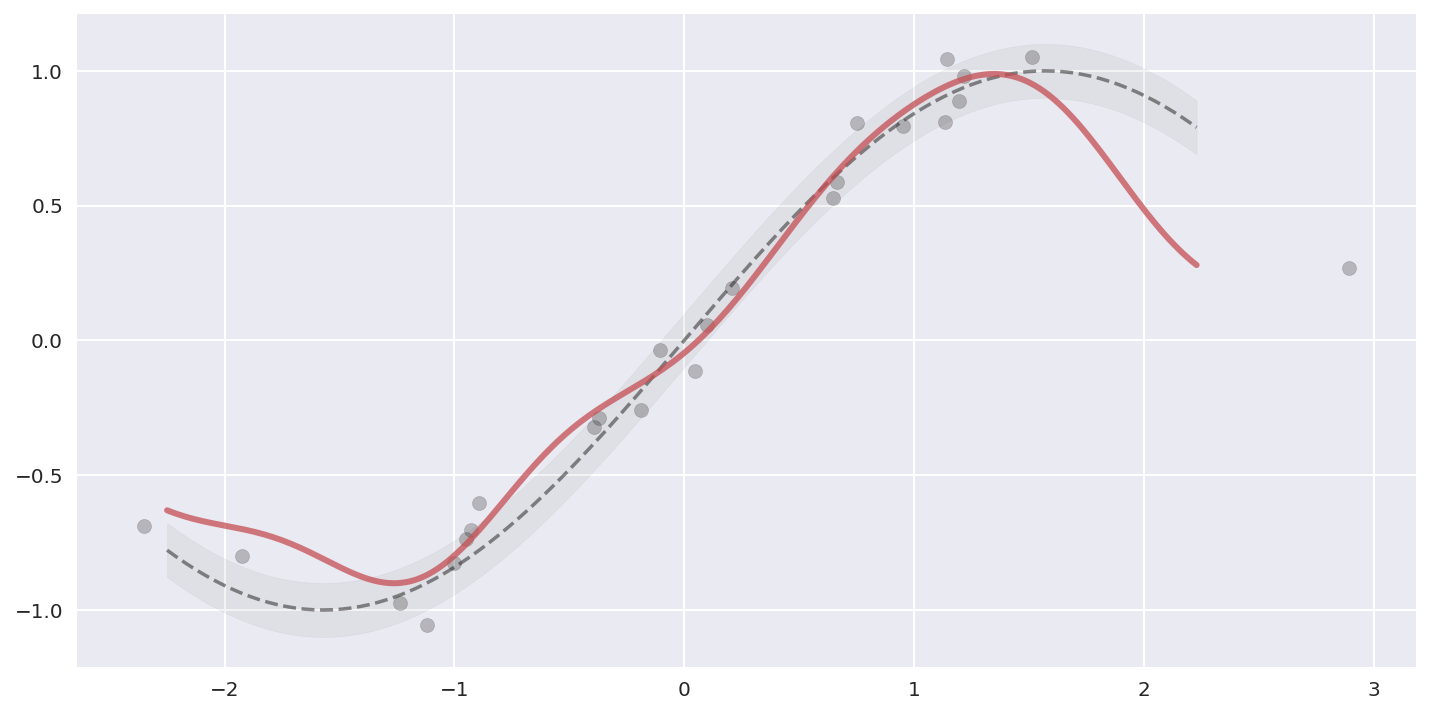

In [21]:
true_X = np.arange(-2.25, 2.25, h)
true_y = np.sin(true_X)
plt.figure(figsize=(12,6))
plt.plot(true_X, true_y, '--k', alpha=0.5)
plt.fill_between(true_X, true_y-0.1, true_y+0.1, color='k', alpha=0.05)

X = np.random.normal(size=(25)) 
y = np.sin(X) + np.random.normal(scale=0.1, size=(25))
plt.scatter(X, y, color='k', alpha=0.25)

rbf = SVR(gamma=2.5, C=1, kernel='rbf')
rbf.fit(X.reshape(-1,1), y)
plt.plot(true_X, rbf.predict(true_X.reshape(-1,1)), lw=3, alpha=0.75, color='r')

Visualizing model variance when trained on different datasets sampled from the same underlying distribution.

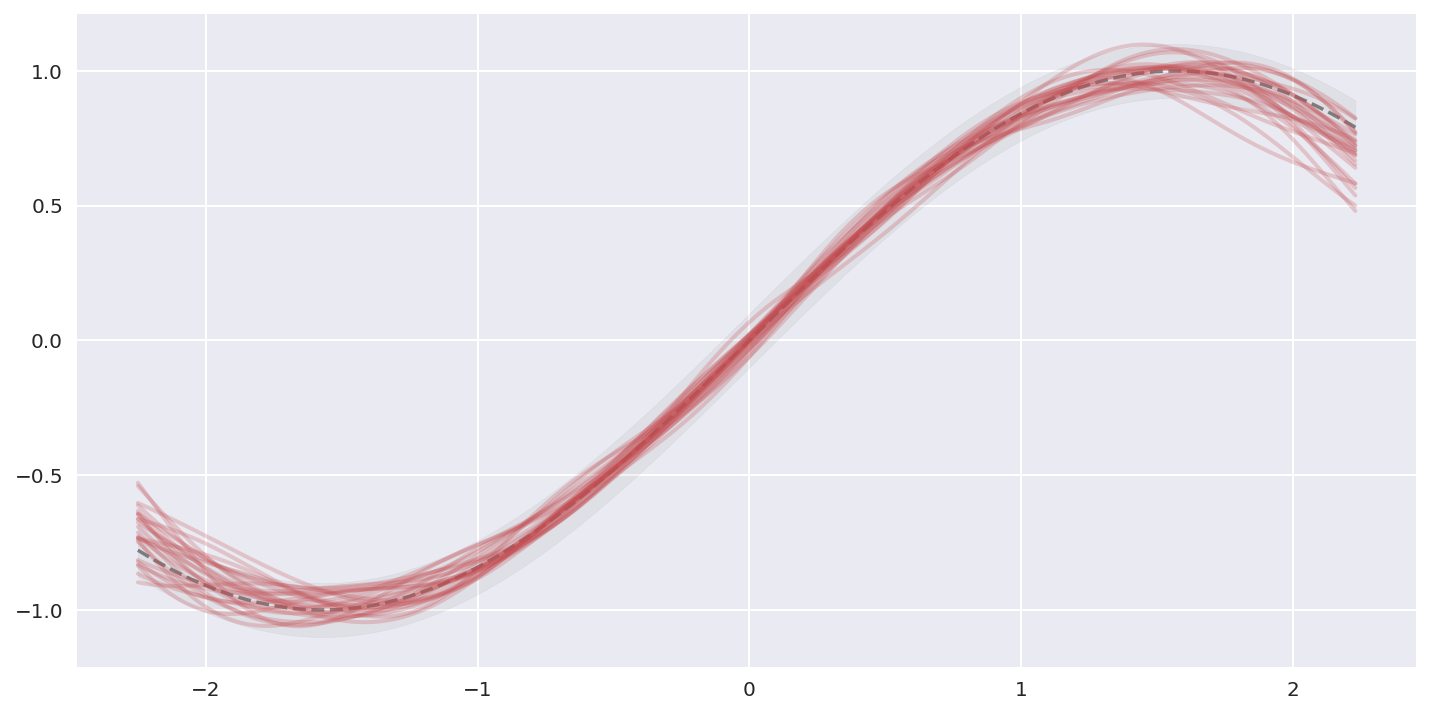

In [5]:
true_X = np.arange(-2.25, 2.25, h)
true_y = np.sin(true_X)
plt.figure(figsize=(12,6))
plt.plot(true_X, true_y, '--k', alpha=0.5)
plt.fill_between(true_X, true_y-0.1, true_y+0.1, color='k', alpha=0.05)

for i in range(25):
    X = np.random.normal(size=(100)) 
    y = np.sin(X) + np.random.normal(scale=0.1, size=(100))
#     plt.scatter(X, y, color='k', alpha=0.25)

    rbf = SVR(gamma=2.5, C=1, kernel='rbf')
    rbf.fit(X.reshape(-1,1), y)

    plt.plot(true_X, rbf.predict(true_X.reshape(-1,1)), lw=2, alpha=0.25, color='r')

## Training vs Test Scores

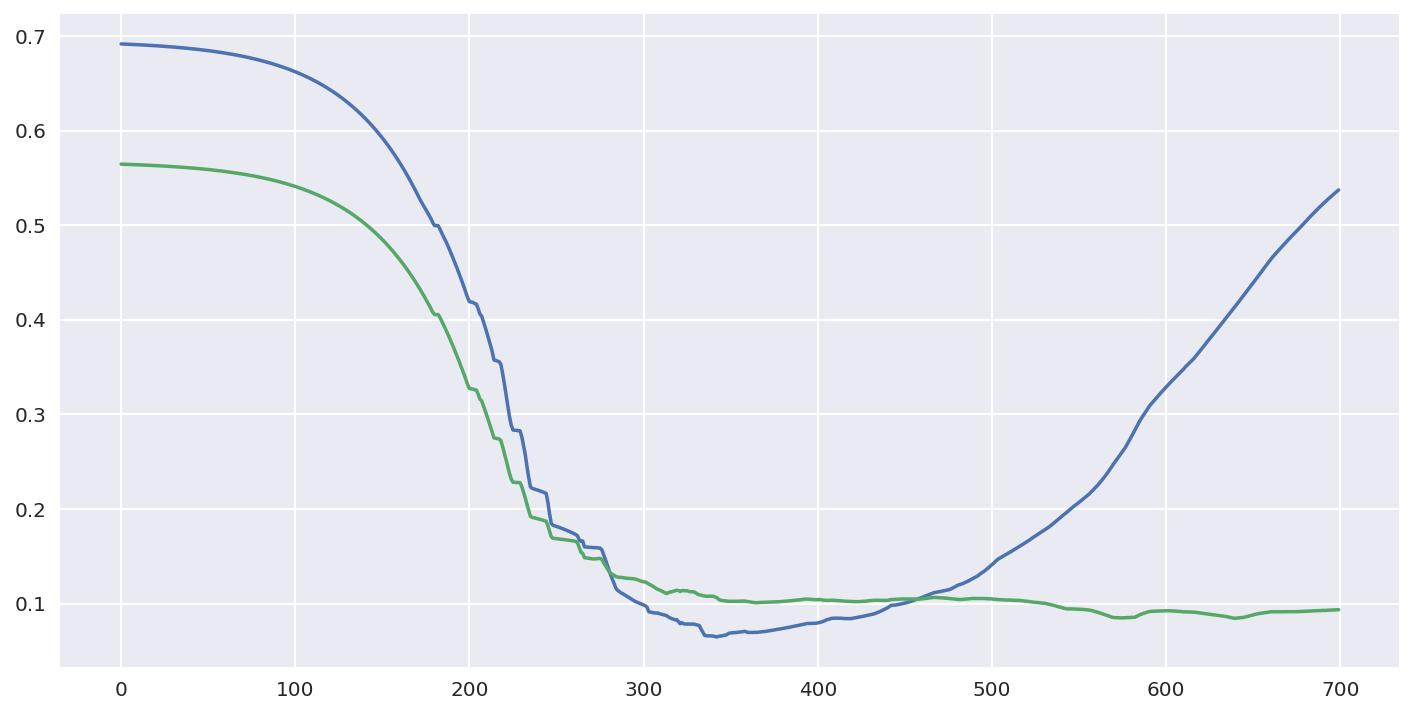

In [6]:
N = 50
theta = np.arange(-4, 3, 0.01)
test_scores = np.zeros(theta.shape)
train_scores = np.zeros(theta.shape)
X = np.random.normal(size=(N)) 
y = np.sin(X) + np.random.normal(scale=0.1, size=(N))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
for i in range(theta.size):
    rbf = SVR(gamma=10**theta[i], C=1, kernel='rbf')
    rbf.fit(X_train.reshape(-1,1), y_train)
    test_scores[i] = mean_absolute_error(rbf.predict(X_test.reshape(-1,1)), y_test)
    train_scores[i] = mean_absolute_error(rbf.predict(X_train.reshape(-1,1)), y_train)
plt.figure(figsize=(12,6))
plt.plot(test_scores)
plt.plot(train_scores)

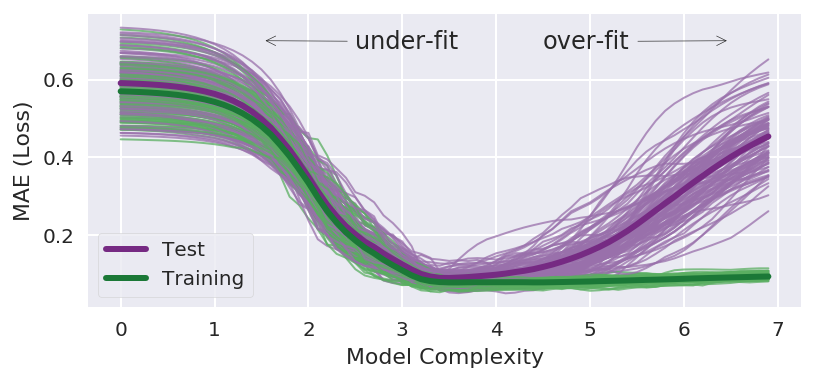

In [85]:
N = 50
M = 100
plt.figure(figsize=(6,3))
theta = np.arange(-4, 3, 0.1)
mean_test = np.zeros(theta.shape)
mean_train = np.zeros(theta.shape)
for j in range(M):
    test_scores = np.zeros(theta.shape)
    train_scores = np.zeros(theta.shape)
    X = np.random.normal(size=(N)) 
    y = np.sin(X) + np.random.normal(scale=0.1, size=(N))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    for i in range(theta.size):
        rbf = SVR(gamma=10**theta[i], C=1, kernel='rbf')
        rbf.fit(X_train.reshape(-1,1), y_train)
        test_scores[i] = mean_absolute_error(rbf.predict(X_test.reshape(-1,1)), y_test)
        train_scores[i] = mean_absolute_error(rbf.predict(X_train.reshape(-1,1)), y_train)
    mean_test += test_scores
    mean_train += train_scores
    plt.plot(theta+4, test_scores, lw=1, alpha=0.75, color='#9970ab')
    plt.plot(theta+4, train_scores, lw=1, alpha=0.75, color='#5aae61')
plt.plot(theta+4, mean_test/M, '-', lw=3, color='#762a83', label='Test')
plt.plot(theta+4, mean_train/M, '-', lw=3, color='#1b7837', label='Training')
plt.xlabel('Model Complexity')
plt.ylabel('MAE (Loss)')
plt.annotate('under-fit', (1.5,0.7), (2.5,0.68), fontsize=12,arrowprops={'arrowstyle':'->'})
plt.annotate('over-fit', 
             xy=(6.5,0.7),
             xytext=(4.5,0.68),
             fontsize=12,
             arrowprops={'arrowstyle':'->'})
plt.legend(loc=3, frameon=True)
# plt.title('Bias-Variance Tradeoff')
plt.tight_layout()
# plt.savefig('plots/b-v.pdf')
# plt.savefig('plots/b-v.png')

## Visualizing Model Selection Variance of 10-Fold CV
We can visualize the variance in model selection through the selected hyperparameter variance.
With 10-fold (shown below) we expect some bias and little variance.
Very low number of folds (e.g. 2) can also induce variance due to how the data is shuffled.
Very small datasets also suffer from variance, making it difficult/impossible to show the bias-varience effect.

This model may be too simple to exhibit the trends in variance we want to highlight.

In [ ]:
N = 500
trials = 10
theta = np.arange(-4, 3, 0.1)
scores = np.zeros((trials, theta.size))
for j in range(trials):
    X = np.random.normal(size=(N)) 
    y = np.sin(X) + np.random.normal(scale=0.1, size=(N))
    for i in range(theta.size):
        rbf = SVR(gamma=10**theta[i], C=1, kernel='rbf')
        z = cross_val_score(rbf, X.reshape(-1,1), y, n_jobs=-1, cv=KFold(10), scoring='neg_mean_absolute_error')
        scores[j, i] = np.mean(z)

plt.figure(figsize=(12,6))
for j in range(trials):
    plt.plot(theta, scores[j,:], alpha=0.25, color='k')
    m = np.argmax(scores[j,:])
    plt.scatter(theta[m], np.zeros(1), marker='|', color='k', alpha=0.5)

Plotting selected hyper-parameters $\theta$

In [ ]:
plt.figure(figsize=(12,6))
for j in range(trials):
    plt.plot(theta, 1+scores[j,:], alpha=0.25, color='k')
    m = np.argmax(scores[j,:])
#     plt.scatter(theta[m], np.zeros(1), marker='|', color='k', alpha=0.5, s=100)
    plt.vlines(theta[m], linestyles='--', ymax=1+scores[j,m], ymin=0, lw=1, alpha=0.25)

Variance of $\theta$ and KDE

In [ ]:
plt.figure(figsize=(12,6))
seaborn.kdeplot(np.max(scores, axis=1), shade=True)
seaborn.rugplot(np.max(scores, axis=1))
np.std(np.max(scores, axis=1))

## Visualizing Model Selection Variance of LOO-CV
We can visualize the variance in model selection through the selected hyperparameter variance.
With Leave One Out (shown below) we expect little bias and increased variance.
Hard to show the bias with this model (todo: do this again with better model).

In [ ]:
N = 500
trials = 10
theta = np.arange(-4, 3, 0.1)
scores_loo = np.zeros((trials, theta.size))
for j in range(trials):
    X = np.random.normal(size=(N)) 
    y = np.sin(X) + np.random.normal(scale=0.1, size=(N))
    for i in range(theta.size):
        rbf = SVR(gamma=10**theta[i], C=1, kernel='rbf')
        z = cross_val_score(rbf, X.reshape(-1,1), y, n_jobs=-1, cv=LeaveOneOut(), scoring='neg_mean_absolute_error')
        scores_loo[j, i] = np.mean(z)
plt.figure(figsize=(12,6))
for j in range(trials):
    plt.plot(theta, scores_loo[j,:], alpha=0.25, color='k')
    m = np.argmax(scores_loo[j,:])
    plt.scatter(theta[m], np.zeros(1), marker='|', color='k', alpha=0.5)

In [ ]:
plt.figure(figsize=(12,6))
for j in range(trials):
    plt.plot(theta, 1+scores_loo[j,:], alpha=0.25, color='k')
    m = np.argmax(scores_loo[j,:])
#     plt.scatter(theta[m], np.zeros(1), marker='|', color='k', alpha=0.5, s=100)
    plt.vlines(theta[m], linestyles='--', ymax=1+scores_loo[j,m], ymin=0, lw=2, alpha=0.25)

Variance and KDE of $\theta$

In [ ]:
plt.figure(figsize=(12,6))
seaborn.kdeplot(np.max(scores_loo, axis=1), shade=True)
seaborn.rugplot(np.max(scores_loo, axis=1))
np.std(np.max(scores_loo, axis=1))